# Алгоритм Гирвана-Ньюмена. Лувенский алгоритм.

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. "Лекция 3: Выделение сообществ"
* Документация:
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.modularity.html
    * https://matplotlib.org/stable/users/explain/colors/colormaps.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_communities.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html
    * https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html

## Вопросы для совместного обсуждения

1\. Обсудите принцип работы алгоритма Гирвана-Ньюмена и Лувенского алгоритма и реализации этих алгоритмов в `networkx.`

In [ ]:
import networkx as nx

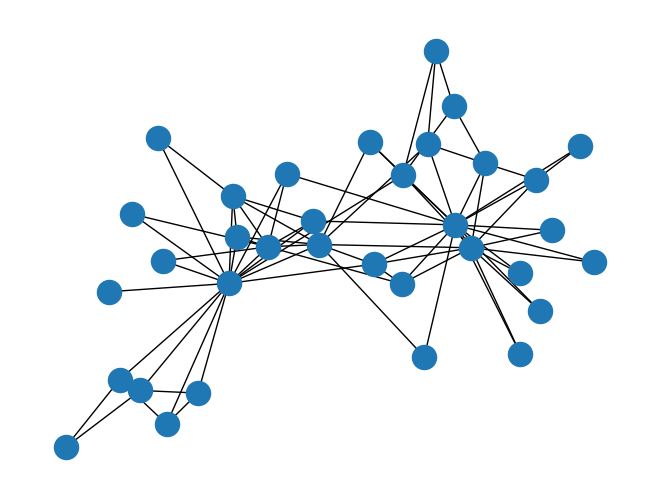

In [ ]:
G = nx.karate_club_graph()
nx.draw(G)

In [ ]:
comms_iter = nx.community.girvan_newman(G)
comms_iter

<generator object girvan_newman at 0x7e1ac88afdf0>

In [ ]:
c = next(comms_iter)
c

({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
 {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})

In [ ]:
c = next(comms_iter)
c

({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
 {2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33},
 {9})

In [ ]:
for c in comms_iter:
  print(len(c))

In [ ]:
comms_iter = nx.community.louvain_partitions(G)
comms_iter

<generator object louvain_partitions at 0x7e1ac8701690>

In [ ]:
next(comms_iter)

[{0, 11, 17, 19, 21},
 {1, 2, 3, 7, 12, 13},
 {5, 6, 16},
 {4, 10},
 {8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 29, 30, 32, 33},
 {24, 25, 28, 31}]

In [ ]:
comms = nx.community.louvain_communities(G)
comms

[{1, 2, 3, 7, 12, 13},
 {0, 4, 5, 6, 10, 11, 16, 17, 19, 21},
 {8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 29, 30, 32, 33},
 {24, 25, 28, 31}]

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Считайте сеть из файла `communities.edgelist`. Выполните разбиение сети на 2 сообщества с помощью алгоритма Гирвана-Ньюмена. Визуализируйте результат, раскрасив узлы в цвет, соответствующий их сообществу.

- [x] Проверено на семинаре

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/communities.edgelist'
G = nx.read_edgelist(path)

In [4]:
comp = nx.community.girvan_newman(G)
communities = next(comp)

In [5]:
communities

({'23', '32', '37', '49'},
 {'0',
  '1',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '2',
  '20',
  '21',
  '22',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '3',
  '30',
  '31',
  '33',
  '34',
  '35',
  '36',
  '38',
  '39',
  '4',
  '40',
  '41',
  '42',
  '43',
  '44',
  '45',
  '46',
  '47',
  '48',
  '5',
  '6',
  '7',
  '8',
  '9'})

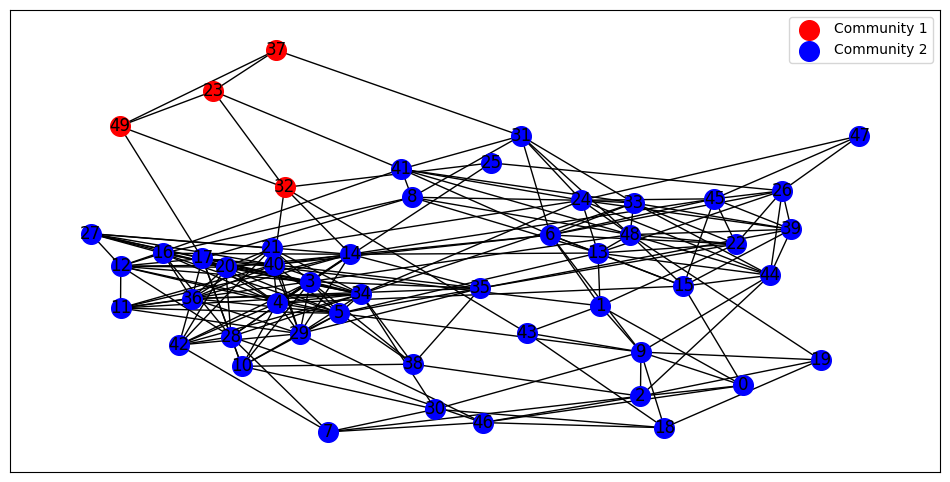

In [6]:
pos = nx.spring_layout(G)
plt.figure(figsize=(12,6))
nx.draw_networkx_nodes(G, pos, nodelist=list(communities[0]),node_size=200, node_color='r', label='Community 1')
nx.draw_networkx_nodes(G, pos, nodelist=list(communities[1]),node_size=200, node_color='b', label='Community 2')
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.legend()
plt.show()

<p class="task" id="2"></p>

2\. Постройте график динамики модулярности для шагов алгоритма Гирвана-Ньюмена. Визуализируйте разбиение сети из предыдущей задачи, при котором достигается наилучшее значение модулярности (выведите это значение на экран). Для визуализации выберите несколько цветов (в соответствии с количеством выделенных сообществ) и раскрасьте узлы __и связи__ в рамках одного сообщества этими цветами. Связи между узлами, состоящими в разных сообществах, отрисуйте черным цветом.

- [x] Проверено на семинаре

In [7]:
comp = nx.community.girvan_newman(G)

0.4315950788751715
2


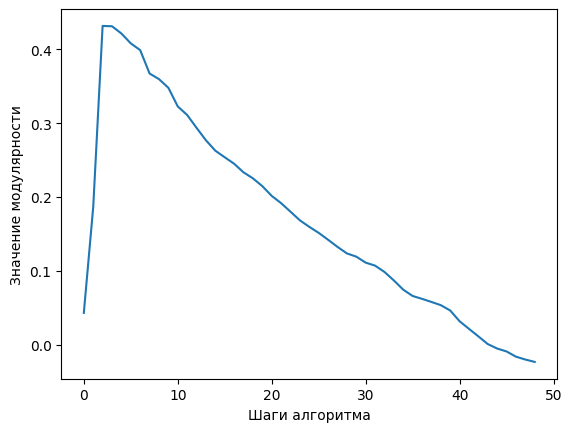

In [8]:
modularity_values = []
best_i = 0
best_modularity = -2
for i,communities in enumerate(comp):
    modularity = nx.community.modularity(G, communities)
    if best_modularity<modularity:
        best_modularity = modularity
        best_i = i
    modularity_values.append(modularity)

plt.plot(modularity_values)
plt.xlabel('Шаги алгоритма')
plt.ylabel('Значение модулярности')
print(best_modularity)
print(best_i)

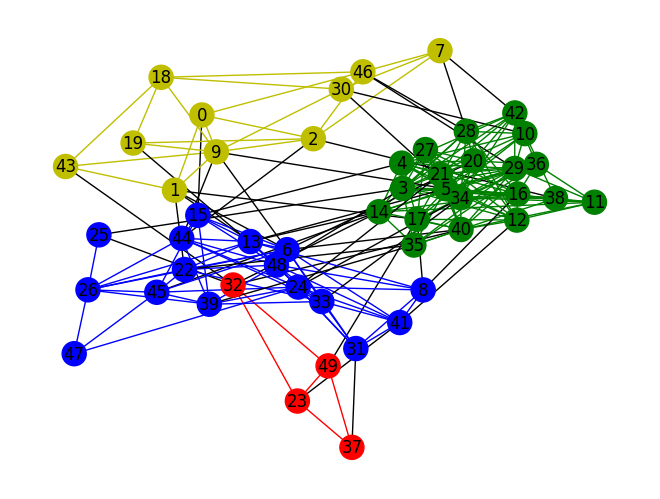

In [9]:
comp = nx.community.girvan_newman(G)
k = 0
for communities in comp:
    if k == best_i:
        best_partition = communities
        break
    k+=1
pos = nx.spring_layout(G)
colors = ['r', 'b', 'g', 'y']
color_map = []
for node in G.nodes:
    for i, community in enumerate(best_partition):
        if node in community:
            color_map.append(colors[i % len(colors)])

edge_colors = []
for u, v in G.edges():
    if (u in list(best_partition[0]) and v in list(best_partition[0])):
        edge_colors.append('r')
    elif (u in list(best_partition[1]) and v in list(best_partition[1])):
        edge_colors.append('b')
    elif (u in list(best_partition[2]) and v in list(best_partition[2])):
        edge_colors.append('g')
    elif (u in list(best_partition[3]) and v in list(best_partition[3])):
        edge_colors.append('y')
    else:
        edge_colors.append('k')
nx.draw(G, pos, node_color=color_map, edge_color=edge_colors, with_labels=True)
plt.show()

In [10]:
best_modularity = nx.community.modularity(G, best_partition)
print(f"Лучшая модулярность: {best_modularity}")

Лучшая модулярность: 0.4315950788751715


<p class="task" id="3"></p>

3\. Выполните разбиение сети из первого задания на сообщества с помощью Лувенского алгоритма. Визуализируйте результат аналогично предыдущему заданию.

- [ ] Проверено на семинаре

In [15]:
comp = nx.community.louvain_communities(G)
communities = comp
communities

[{'23', '25', '32', '37', '49'},
 {'13',
  '15',
  '22',
  '24',
  '26',
  '31',
  '33',
  '39',
  '41',
  '44',
  '45',
  '47',
  '48',
  '6',
  '8'},
 {'0', '1', '18', '19', '2', '30', '43', '46', '7', '9'},
 {'10',
  '11',
  '12',
  '14',
  '16',
  '17',
  '20',
  '21',
  '27',
  '28',
  '29',
  '3',
  '34',
  '35',
  '36',
  '38',
  '4',
  '40',
  '42',
  '5'}]

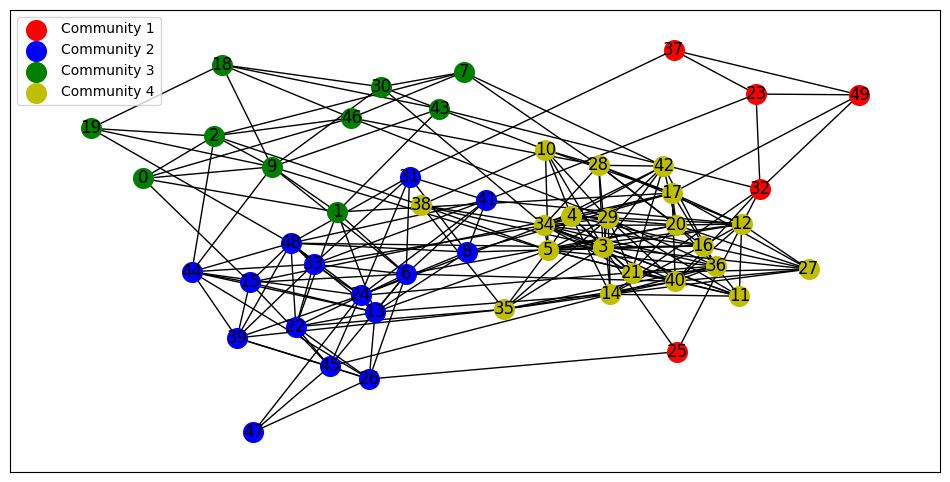

In [18]:
pos = nx.spring_layout(G)
plt.figure(figsize=(12,6))
nx.draw_networkx_nodes(G, pos, nodelist=list(communities[0]),node_size=200, node_color='r', label='Community 1')
nx.draw_networkx_nodes(G, pos, nodelist=list(communities[1]),node_size=200, node_color='b', label='Community 2')
nx.draw_networkx_nodes(G, pos, nodelist=list(communities[2]),node_size=200, node_color='g', label='Community 3')
nx.draw_networkx_nodes(G, pos, nodelist=list(communities[3]),node_size=200, node_color='y', label='Community 4')
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.legend()
plt.show()

<p class="task" id="4"></p>

4\. Постройте матрицу смежности для сети. Постройте матрицу смежности для сети, в которой узлы перенумерованы в порядке возрастания номера сообщества, которому они принадлежат (т.е. номера $0...C_1-1$ даются $C_1$ узлам, принадлежащим первому сообществу; номера $C_1...C_2-1$ даются $C_2$ узлам, принадлежащим второму сообществу и т.д.). Для разбиения графа на сообщества воспользуйтесь Лувенским алгоритмом.

Визуализируйте две матрицы смежности при помощи `seaborn.heatmap`. Расположите рисунки рядом по горизонтали, добавьте названия рисунков. Сравните полученные изображения и сделайте выводы.

- [ ] Проверено на семинаре

In [25]:
import seaborn as sns
import numpy as np

In [31]:
comp = nx.community.louvain_communities(G)
communities = comp
adj_matrix = nx.adjacency_matrix(G).toarray()
node_community = {node: i for i, comm in enumerate(communities) for node in comm}
new_order = [node for comm in communities for node in comm]
new_adj_matrix = nx.to_numpy_array(G, nodelist=new_order)

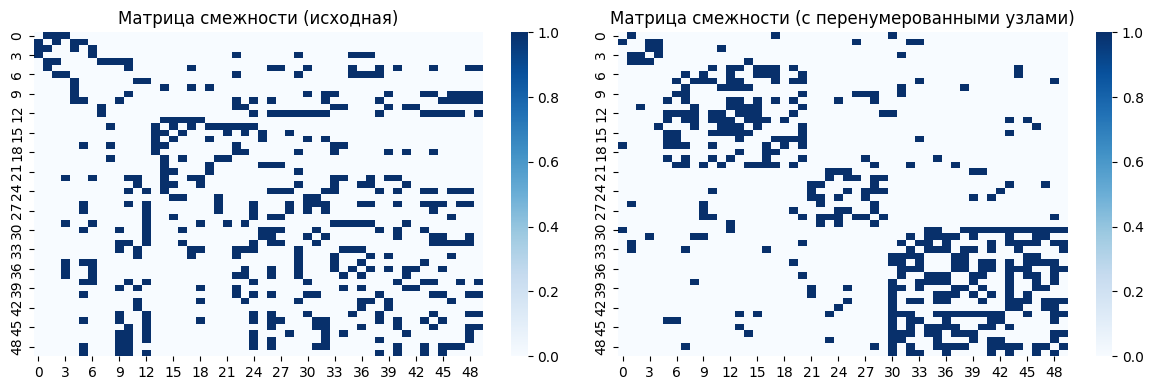

In [32]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(adj_matrix, cmap="Blues")
plt.title('Матрица смежности (исходная)')

plt.subplot(1, 2, 2)
sns.heatmap(new_adj_matrix, cmap="Blues")
plt.title('Матрица смежности (с перенумерованными узлами)')

plt.tight_layout()
plt.show()

<p class="task" id="5"></p>

5\. Оформите результаты работы алгоритмов в виде таблицы

| Алгоритм                      | Средняя плотность сообществ | Модулярность | Покрытие | Эффективность |
|-------------------------------|-----------------------------|--------------|----------|----------|
| Гирвана-Ньюмена              |                             |              |          |          |
| Лувенский                     |                             |              |          |          |

Для представления данных в табличном виде используйте `pandas`. Для алгоритма Гирвана-Ньюмена берите разбиение, максимизирующее модулярность. Все расчеты метрик при решении этой задачи выполните повторно.

- [ ] Проверено на семинаре

In [41]:
import pandas as pd

In [42]:
comp = nx.community.girvan_newman(G)
k = 0
for communities in comp:
    if k == best_i:
        best_partition = communities
        community1 = best_partition[0]
        community2 = best_partition[1]

        subgraph_community1 = G.subgraph(community1)
        subgraph_community2 = G.subgraph(community2)

        density_community1 = nx.density(subgraph_community1)
        density_community2 = nx.density(subgraph_community2)

        density_girvan_newman = (density_community1 + density_community2) / 2
        modularity_girvan_newman = nx.community.modularity(G, best_partition)
        coverage_girvan_newman,efficiency_girvan_newman = nx.community.partition_quality(G,best_partition)
        break
    k+=1

In [43]:
comp = nx.community.louvain_communities(G)
community1 = comp[0]
community2 = comp[1]
community3 = comp[2]
community4 = comp[3]
subgraph_community1 = G.subgraph(community1)
subgraph_community2 = G.subgraph(community2)
subgraph_community3 = G.subgraph(community3)
subgraph_community4 = G.subgraph(community4)
density_community1 = nx.density(subgraph_community1)
density_community2 = nx.density(subgraph_community2)
density_community3 = nx.density(subgraph_community3)
density_community4 = nx.density(subgraph_community4)
density_louvain = (density_community1 + density_community2 + density_community3 + density_community4) / 4
modularity_louvain = nx.community.modularity(G, comp)
coverage_louvain,efficiency_louvain = nx.community.partition_quality(G,comp)

In [44]:
data = {
    'Алгоритм': ['Гирвана-Ньюмен', 'Лувенский'],
    'Средняя плотность сообществ': [density_girvan_newman, density_louvain],
    'Модулярность': [modularity_girvan_newman, modularity_louvain],
    'Покрытие': [coverage_girvan_newman, coverage_louvain],
    'Эффективность': [efficiency_girvan_newman, efficiency_louvain]
}

df = pd.DataFrame(data)
print(df)

         Алгоритм  Средняя плотность сообществ  Модулярность  Покрытие  \
0  Гирвана-Ньюмен                     0.637500      0.431595  0.814815   
1       Лувенский                     0.513868      0.435228  0.814815   

   Эффективность  
0       0.816327  
1       0.825306  
